<function matplotlib.pyplot.show(close=None, block=None)>

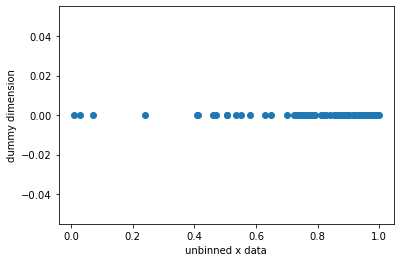

In [1]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from math import exp
from iminuit import Minuit

xi = np.array([0.01,0.03,0.07,0.24,0.41,0.413,0.46,0.47,0.505,0.507,0.534,0.55,0.58,0.63,0.65,
0.701,0.723,0.731,0.737,0.743,0.751,0.76,0.763,0.773,0.775,0.781,0.787,0.789,0.792,
    0.81,0.821,0.829,0.842,0.853,0.859,0.862,0.871,0.878,0.883,0.892,0.894,
    0.901,0.903,0.914,0.917,0.9214,0.932,0.939,0.944,0.9542,0.956,0.958,0.966,0.971,0.981,0.982,0.987,0.991,0.993,0.998])
yi_dummy = np.zeros_like(xi)
fig,ax = plt.subplots()
plt.scatter(xi,yi_dummy)
plt.xlabel('unbinned x data')
plt.ylabel('dummy dimension')
plt.show

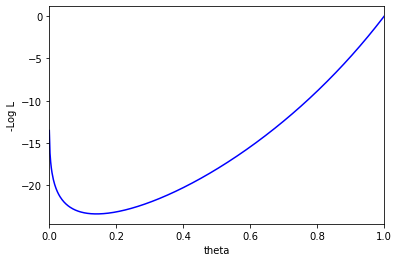

In [12]:
#One parameter probability distribution:
def rho1(x): return 1  # constant
def rho2(x): return 3*x*x
def rho(x,theta): 
    return theta*rho1(x)+(1-theta)*rho2(x)
assert(abs(integrate.quad(rho1,0,1)[0]-1.)<1.e-5)
assert(abs(integrate.quad(rho2,0,1)[0]-1.)<1.e-5)

def negative_logL_unbinnedML(theta):
    return -np.sum(np.log(rho(xi,theta)))   
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
plt.margins(x=0) #disable plotting margins on x axis
thetaplot = np.linspace(0.,1.,500)
logLplot = [ negative_logL_unbinnedML(theta) for theta in thetaplot]

plt.plot(thetaplot,logLplot, 'b')
plt.xlabel('theta')
plt.ylabel('-Log L')
plt.show
fig.savefig("log_l_plot_poisson.pdf")
#thetamax,sig1,sig2 = logL_explorer(negative_logL_unbinnedML,maximum=False,xmin=0,xmax=1)

In [13]:
m = Minuit(negative_logL_unbinnedML, theta=0.0001)
m.errordef=1/2
m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties in Hesse approximation

m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -23.4                      │              Nfcn = 52               │
│ EDM = 1.52e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ theta │   0.14    │   0.08    │   -0.07    │    0.09    │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │         theta         │
├──────────┼───────────┬───────────┤
│  Error   │   -0.07   │   0.09    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───────┬───────┐
│       │ theta │
├───────┼───────┤
│ theta │ 0.006 │
└───────┴───────┘

best estimate for theta= <ValueView theta=0.14079495888246565>
now we compare binned data to unbinned ML fit results
binned data, not used for fit [ 3  0  1  0  4  5  2 14 12 19]


<function matplotlib.pyplot.show(close=None, block=None)>

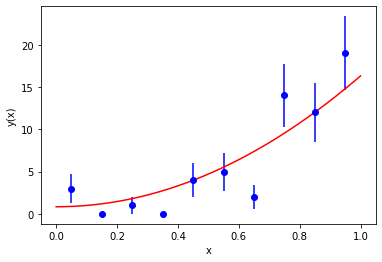

In [14]:
print("best estimate for theta=",m.values)
thetamax = m.values[0]
print("now we compare binned data to unbinned ML fit results")
yi_binned = np.histogram(xi,bins=10,range=(0,1))[0]
xi_binned = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
print("binned data, not used for fit",yi_binned)
fig, ax = plt.subplots() # get a handle on figure and its axis
#plt.margins(x=0) #disable plotting margins
plt.errorbar(xi_binned,yi_binned,np.sqrt(yi_binned), fmt='o', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
xplot = np.linspace(0,1,500)
S = len(xi)
binwid = 0.1
fitplot = np.array([S*binwid*rho(x,thetamax) for x in xplot])
plt.plot(xplot,fitplot, 'r')
plt.show